In [162]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


In [163]:
# Read CSV file
complete_data = pd.read_csv('HR-Employee-Attrition.csv', low_memory=False)
complete_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [164]:
# Check for data types
complete_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [165]:
# Check for the number of the values (to see if we have missing value)
complete_data.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [166]:
# Dropping unwanted columns
cleaned_data = complete_data.drop(columns=['BusinessTravel', 'EmployeeCount', 'DistanceFromHome',
                                             'Over18', 'StockOptionLevel', 'StandardHours'])
cleaned_data.head()

,Age,Attrition,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,Sales,2,Life Sciences,1,2,Female,94,...,11,3,1,8,0,1,6,4,0,5
1,49,No,279,Research & Development,1,Life Sciences,2,3,Male,61,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,1373,Research & Development,2,Other,4,4,Male,92,...,15,3,2,7,3,3,0,0,0,0
3,33,No,1392,Research & Development,4,Life Sciences,5,4,Female,56,...,11,3,3,8,3,3,8,7,3,0
4,27,No,591,Research & Development,1,Medical,7,1,Male,40,...,12,3,4,6,3,3,2,2,2,2


In [167]:
# selecting numeric columns to crate a summary statistic table
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns
# Getting the mean, median, var, std, sem for each column
summary_table = cleaned_data[numeric_cols].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,Age,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.923810,802.485714,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6.502931e+03,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
median,36.000000,802.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4.919000e+03,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
var,83.455049,162819.593737,1.048914,362433.299749,1.194829,413.285626,0.506319,1.225316,1.216270,2.216486e+07,...,13.395144,0.130194,1.169013,60.540563,1.662219,0.499108,37.534310,13.127122,10.384057,12.731595
std,9.135373,403.509100,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4.707957e+03,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
sem,0.238269,10.524335,0.026712,15.702015,0.028510,0.530233,0.018559,0.028871,0.028764,1.227931e+02,...,0.095459,0.009411,0.028200,0.202939,0.033627,0.018426,0.159792,0.094499,0.084048,0.093064


In [168]:
# Check the values of Department column
cleaned_data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [169]:
# Check the value for MaritalStatus column
cleaned_data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [170]:
# Check the value for EducationField column
cleaned_data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [171]:
cleaned_data[['Department', 'Attrition','EducationField', 'Gender', 'Age', 'DailyRate', 'EnvironmentSatisfaction',
               'JobSatisfaction', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
              'WorkLifeBalance', 'YearsAtCompany']]

,Department,Attrition,EducationField,Gender,Age,DailyRate,EnvironmentSatisfaction,JobSatisfaction,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany
0,Sales,Yes,Life Sciences,Female,41,1102,2,4,Yes,3,1,1,6
1,Research & Development,No,Life Sciences,Male,49,279,3,2,No,4,4,3,10
2,Research & Development,Yes,Other,Male,37,1373,4,3,Yes,3,2,3,0
3,Research & Development,No,Life Sciences,Female,33,1392,4,3,Yes,3,3,3,8
4,Research & Development,No,Medical,Male,27,591,1,2,No,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Research & Development,No,Medical,Male,36,884,3,4,No,3,3,3,5
1466,Research & Development,No,Medical,Male,39,613,4,1,No,3,1,3,7
1467,Research & Development,No,Life Sciences,Male,27,155,2,2,Yes,4,2,3,6
1468,Sales,No,Medical,Male,49,1023,4,2,No,3,4,2,9


### What's the impace of income toward attrition
Is the income really a major reason for people to leave?

### Question to be asked:
##### What is the average monthly income by department? is there any significant differences between individuals who quits and who don't?
##### Are individuals with lower income has a lower job satisfaction than the ones who are getting higher income?
##### Do employees who quit the organization have much lower income than people who didn't quit?

In [186]:
# Printing summary statistics for monthly income
summary_stat = cleaned_data['MonthlyIncome'].describe()
print(round(summary_stat,2))

count     1470.00
mean      6502.93
std       4707.96
min       1009.00
25%       2911.00
50%       4919.00
75%       8379.00
max      19999.00
Name: MonthlyIncome, dtype: float64


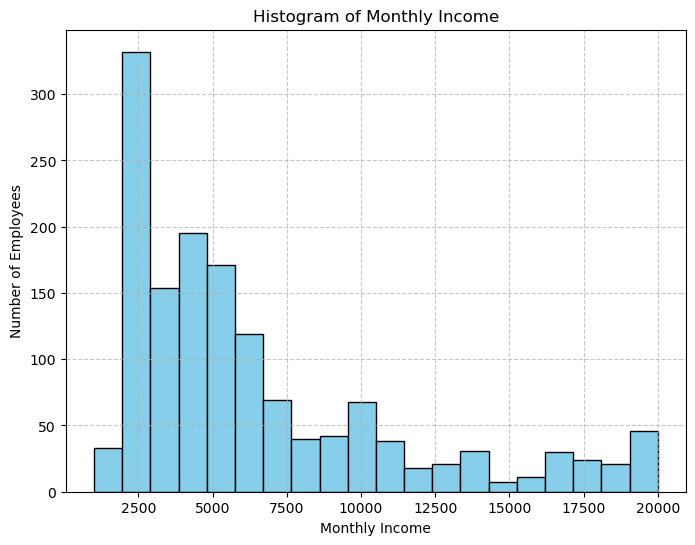

In [175]:
# Plot histogram of monthly income
plt.figure(figsize=(8, 6))
plt.hist(cleaned_data['MonthlyIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('monthly_income_output/histogram_of_monthly_income.png')
plt.show()

Attrition
No     1233
Yes     237
Name: count, dtype: int64


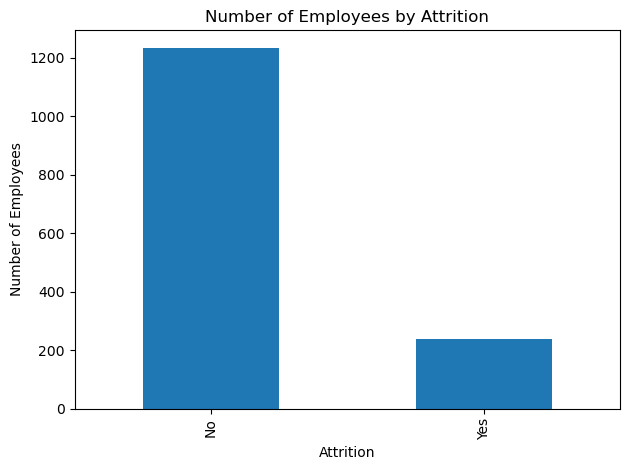

In [176]:
# get the total employees by attrition and plot it.
total_att = cleaned_data['Attrition'].value_counts()
print(total_att)
total_att.plot(kind='bar', ylabel='Number of Employees', title='Number of Employees by Attrition')
plt.tight_layout()
plt.savefig('monthly_income_output/employees_attrition.png')
plt.show()

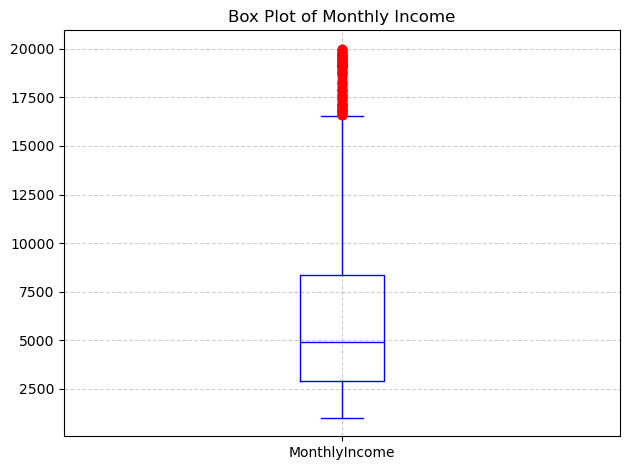

In [177]:
# Create a box plot
cleaned_data['MonthlyIncome'].plot(kind='box', title='Box Plot of Monthly Income', color='b', sym='r')
plt.grid(True, linestyle='--', alpha=.6)
plt.tight_layout()
plt.savefig('monthly_income_output/boxplot_of_monthly_income.png')
plt.show()

In [178]:
# Calculating the outliers and IQR to exclude them from the analysis.

# Calculate IQR to exclude the outliers
Q1 = cleaned_data['MonthlyIncome'].quantile(0.25)
Q3 = cleaned_data['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
filtered_outliers = cleaned_data[(cleaned_data['MonthlyIncome'] >= Q1 - 1.5 * IQR) | (cleaned_data['MonthlyIncome'] <= Q3 + 1.5 * IQR)]

In [184]:
# Get the average income for each department
avg_dep = filtered_outliers.groupby(['Department', 'Attrition'])['MonthlyIncome'].mean().reset_index()
print(round(avg_dep,2))

               Department Attrition  MonthlyIncome
0         Human Resources        No        7345.98
1         Human Resources       Yes        3715.75
2  Research & Development        No        6630.33
3  Research & Development       Yes        4108.08
4                   Sales        No        7232.24
5                   Sales       Yes        5908.46


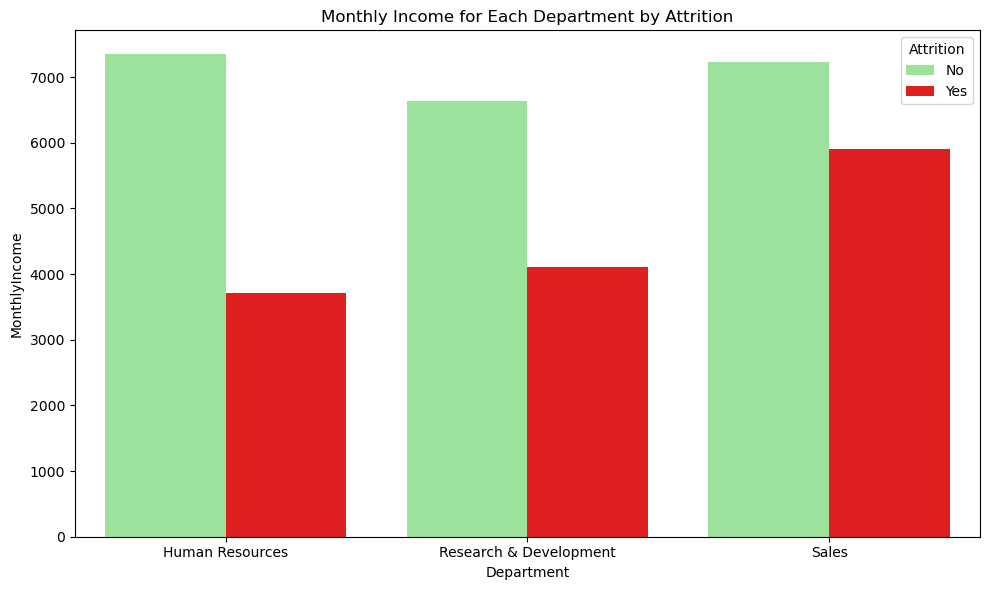

In [180]:
# plotting the data into a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='MonthlyIncome', hue='Attrition', data=avg_dep, palette=('lightgreen', 'red'))
plt.title('Monthly Income for Each Department by Attrition')
plt.tight_layout()
plt.savefig('monthly_income_output/monthly_income_by_department.png')
plt.show()

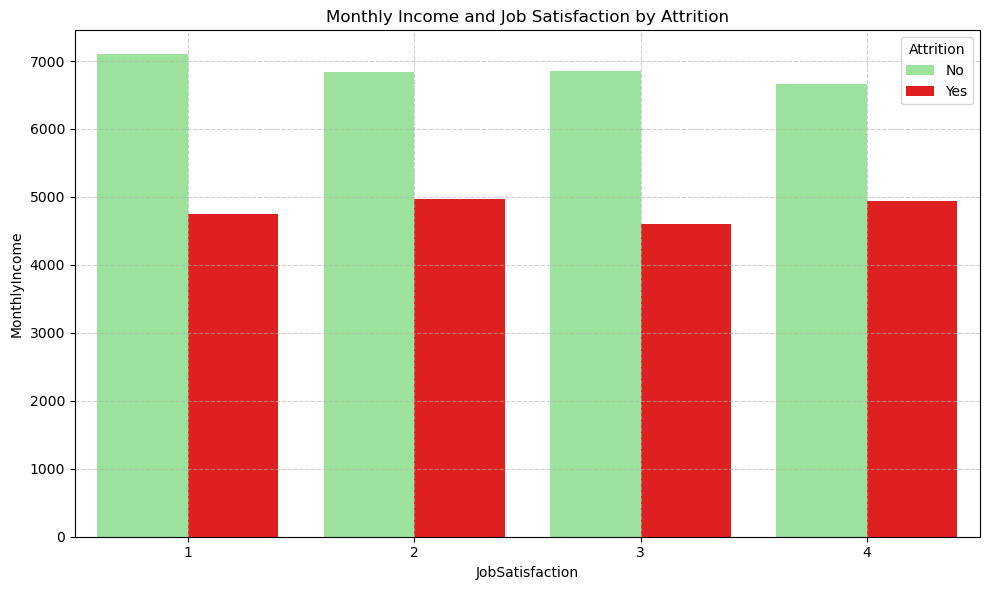

In [194]:
# Getting the job satisfaction by income
income_sat = filtered_outliers.groupby(['Attrition', 'JobSatisfaction'])['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='JobSatisfaction', y='MonthlyIncome', hue='Attrition', data=income_sat, palette=('lightgreen', 'red'))
plt.title('Monthly Income and Job Satisfaction by Attrition')
plt.grid(True, alpha=.6, linestyle='--')
plt.tight_layout()
plt.savefig('monthly_income_output/monthly_income_job_satisfaction.png')
plt.show()

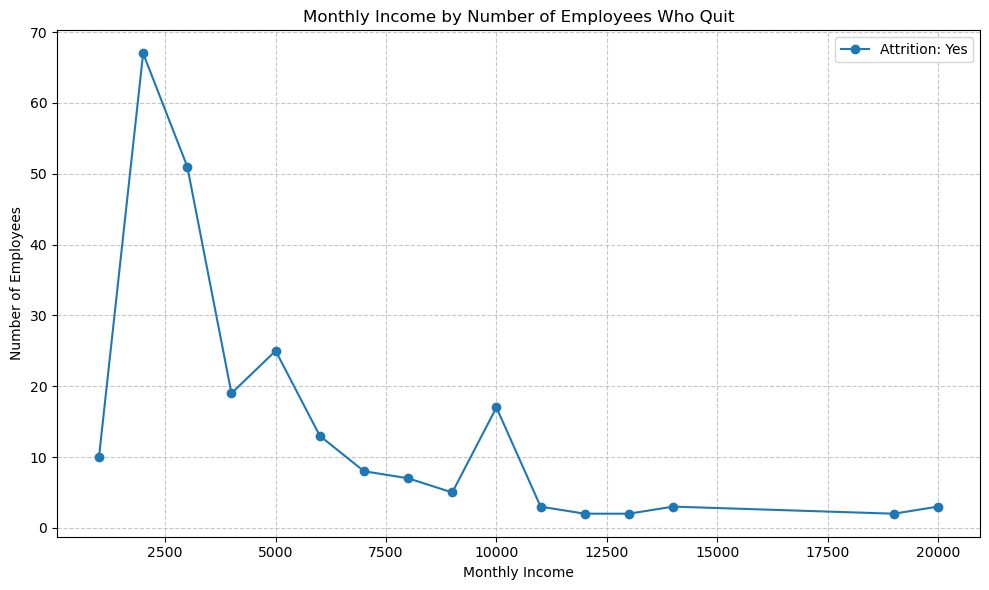

In [182]:
# Plotting the number of employees and monthly income by attrition
rate_att = filtered_outliers.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Round the monthly income to the nearest thousand
rate_att['MonthlyIncome'] = rate_att['MonthlyIncome'].round(-3)

# Group data by rounded monthly income and attrition status, and calculate counts
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).sum().reset_index()

# Plot the line plot using Matplotlib
plt.figure(figsize=(10, 6))
attrition_yes = rate_att[rate_att['Attrition'] == 'Yes']

plt.plot(attrition_yes['MonthlyIncome'], attrition_yes['Counts'], label='Attrition: Yes', marker='o')

plt.title('Monthly Income by Number of Employees Who Quit')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_income_output/monthly_income_counts.png')
plt.show()

## Summary
- Income by Departments: As we can see there is a huge difference in Monthly Income in each department between people who quit and who does not.
- Income and Job Satisfaction: It seems that monthly income does not impact the job satisfaction.
- Monthly Income And number of employees: As seen in the last chart, the attrition rate for people who quit is evidently high at very low level of income which decreases further on a higher income to reach to a steady line.

## Overall summary
At the end of this analysis, it's fair to say that the income is an important factor for employees to leave the job and look for another one with a better income and when the monthly income is decent, the chances that employees leave the organization is low.